In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

In [ ]:
# EDA

In [3]:
df = pd.read_csv('pacific.csv')
df.head()

,ID,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,19490611,0,TS,20.2N,106.3W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,19490611,600,TS,20.2N,106.4W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,19490611,1200,TS,20.2N,106.7W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,19490611,1800,TS,20.3N,107.7W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,19490612,0,TS,20.4N,108.6W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              26137 non-null  int64 
 1   Status            26137 non-null  object
 2   Latitude          26137 non-null  int32 
 3   Longitude         26137 non-null  int32 
 4   Minimum Pressure  26137 non-null  int64 
 5   Low Wind NE       26137 non-null  int64 
 6   Low Wind SE       26137 non-null  int64 
 7   Low Wind SW       26137 non-null  int64 
 8   Low Wind NW       26137 non-null  int64 
 9   Moderate Wind NE  26137 non-null  int64 
 10  Moderate Wind SE  26137 non-null  int64 
 11  Moderate Wind SW  26137 non-null  int64 
 12  Moderate Wind NW  26137 non-null  int64 
 13  High Wind NE      26137 non-null  int64 
 14  High Wind SE      26137 non-null  int64 
 15  High Wind SW      26137 non-null  int64 
 16  High Wind NW      26137 non-null  int64 
dtypes: int32(2),

In [4]:
df.shape

(26137, 20)

In [5]:
df.isna().sum()

ID                  0
Date                0
Time                0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64

In [6]:
df[df.duplicated()]

,ID,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW


In [7]:
df['Status'].value_counts()

 TS     10076
 TD      6965
 HU      6765
 LO      1828
 DB       217
 ET       152
 EX       110
 SS         7
 PT         6
 ST         6
 SD         4
 HU         1
Name: Status, dtype: int64

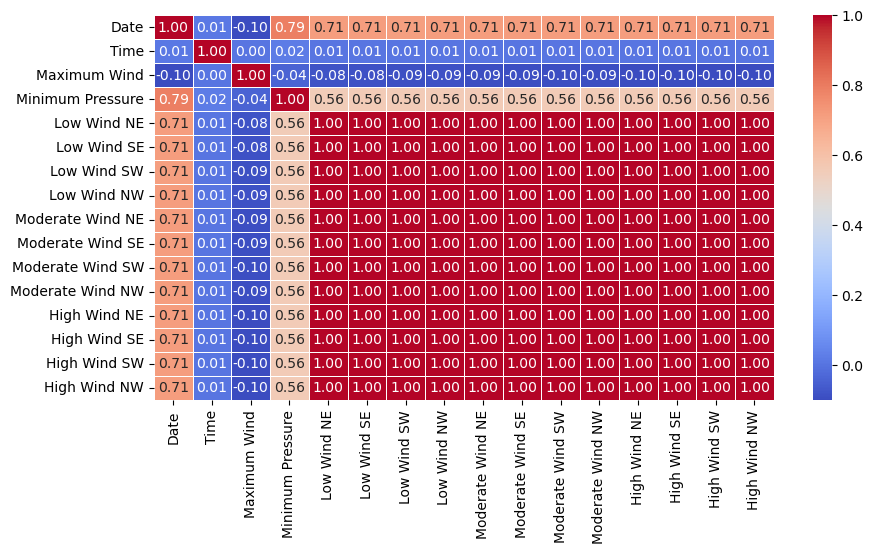

In [8]:
corr=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.show()

In [9]:
df.drop('Latitude', axis = 1, inplace=True)

In [10]:
df.drop('Longitude', axis = 1, inplace=True)

In [19]:
df.drop('Time', axis = 1, inplace=True)

In [11]:
df.drop('Date', axis = 1, inplace=True)

In [12]:
df.drop('ID', axis = 1, inplace=True)

In [13]:
df.head()

,Time,Status,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,0,TS,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,600,TS,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,1200,TS,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,1800,TS,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,0,TS,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [36]:
# le = LabelEncoder()
# df['Latitude'] = le.fit_transform(df['Longitude'])
# df['Longitude'] = le.fit_transform(df['Longitude'])


In [14]:
X = df.drop('Status', axis = 1)
X.head()

,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,0,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,600,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,1200,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,1800,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,0,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [15]:
X

,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,0,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,600,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,1200,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,1800,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,0,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,1200,35,1002,60,0,0,0,0,0,0,0,0,0,0,0
26133,1800,30,1007,0,0,0,0,0,0,0,0,0,0,0,0
26134,0,30,1008,0,0,0,0,0,0,0,0,0,0,0,0
26135,600,25,1009,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
y = df.Status

In [17]:
y

0         TS
1         TS
2         TS
3         TS
4         TS
        ... 
26132     LO
26133     LO
26134     LO
26135     LO
26136     LO
Name: Status, Length: 26137, dtype: object

In [18]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [19]:
pred = model.predict(X)
pred

array([' TS', ' TS', ' TS', ..., ' HU', ' LO', ' LO'], dtype=object)

In [20]:
accuracy_score(y, pred)

0.7786662585606612

In [21]:
confusion_matrix(y, pred)

array([[   0,    0,    0,    1,    0,  216,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    6,    0,    0,    0,    0,    0,    0,   92,
          54],
       [   0,    0,    0,   13,    0,   15,    0,    0,    0,    0,   52,
          30],
       [   0,    0,    0, 5895,    0,    0,    0,    0,    0,    0,    0,
         870],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,   63,    0, 1610,    0,    0,    0,    0,  128,
          27],
       [   0,    0,    0,    1,    0,    3,    0,    0,    0,    0,    0,
           2],
       [   0,    0,    0,    1,    0,    3,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           7],
       [   0,    0,    0,    6,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,  218,    0,  899,    0,    0,    0,    0, 4524,
        1324],
       [   0,    0,  

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [25]:
X_train.shape

(17511, 15)

In [26]:
X_test.shape

(8626, 15)

In [27]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = clf.predict(X_test)
y_pred

array([' TD', ' HU', ' HU', ..., ' TD', ' LO', ' TD'], dtype=object)

In [29]:
accuracy_score(y_test, y_pred)

0.9555993507999072

[Text(0.773897676856915, 0.9857142857142858, 'x[3] <= 1005.5\ngini = 0.71\nsamples = 17511\nvalue = [151, 108, 77, 4560, 1, 1257, 4, 2, 5, 4, 4620\n6722]'),
 Text(0.6286421011477611, 0.9571428571428572, 'x[3] <= 989.5\ngini = 0.65\nsamples = 14438\nvalue = [3, 108, 43, 4560, 1, 156, 3, 2, 5, 4, 2968, 6585]'),
 Text(0.4752041932995334, 0.9285714285714286, 'x[3] <= -63.5\ngini = 0.657\nsamples = 10799\nvalue = [0, 107, 33, 4488, 1, 8, 0, 0, 0, 4, 2429, 3729]'),
 Text(0.2569769330832575, 0.9, 'x[0] <= 19630761.0\ngini = 0.665\nsamples = 8569\nvalue = [0, 107, 31, 2383, 0, 8, 0, 0, 0, 0, 2428, 3612]'),
 Text(0.037669596507786694, 0.8714285714285714, 'x[0] <= 19610661.0\ngini = 0.549\nsamples = 1381\nvalue = [0, 0, 25, 650, 0, 5, 0, 0, 0, 0, 41, 660]'),
 Text(0.021587423312883436, 0.8428571428571429, 'x[0] <= 19560611.0\ngini = 0.535\nsamples = 1191\nvalue = [0, 0, 16, 608, 0, 5, 0, 0, 0, 0, 24, 538]'),
 Text(0.0039405379896177446, 0.8142857142857143, 'x[0] <= 19490909.0\ngini = 0.5\nsample

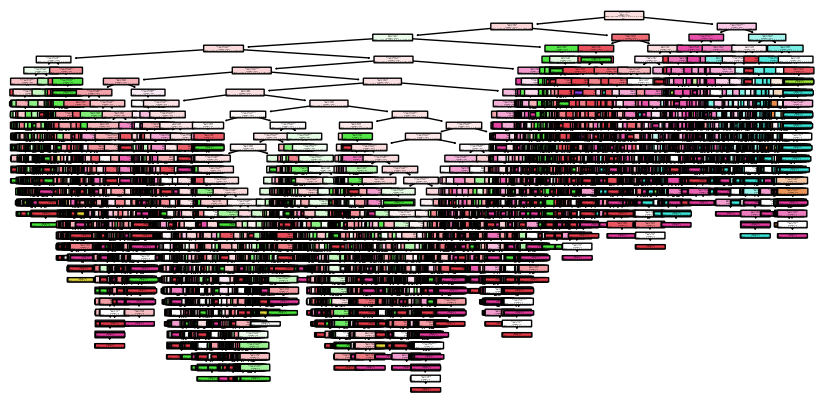

In [57]:
plt.figure(figsize=(10,5))
plot_tree(clf, filled=True, rounded=True)

In [30]:
confusion_matrix(y_test, y_pred)

array([[   0,    0,    0,    0,   64,    0,    0,    0,    0,    2,    0],
       [   0,    0,    0,    2,    0,    0,    0,    0,    0,   36,    6],
       [   0,    0,    5,    1,    0,    0,    0,    0,    0,   17,   10],
       [   0,    0,    0, 2203,    0,    0,    0,    0,    2,    0,    0],
       [   5,    0,    0,    0,  480,    0,    0,    0,    0,   75,   11],
       [   0,    0,    0,    0,    1,    1,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    2,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    2,    0,    0],
       [   0,    0,    1,    0,  133,    0,    0,    0,    0, 2210,    1],
       [   0,    0,    0,    2,    8,    1,    0,    2,    0,    0, 3341]],
      dtype=int64)

In [31]:
# Random Forest & GridSearchCV

In [32]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(n_estimators=50)
rclf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [33]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7789241827034546

In [34]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
tuned_parameters = {
    'n_estimators' : range(2, 50),
    'criterion' : ['gini', 'entropy']
}

In [35]:
grid = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_, grid.best_score_)

{'criterion': 'gini', 'n_estimators': 23} 0.9544856142723713
